In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
print(accuracy_list)

[]


In [5]:
#path_clas = Path('/home/ubuntu/data/autopsy/cross')
#path_lm = Path('/home/ubuntu/data/autopsy')

path_clas = Path('/home/ubuntu/data/autopsy/2014_2018/no_preprocessing')
path_lm = Path('/home/ubuntu/data/autopsy/2014_2018/no_preprocessing')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-2

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])


In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')


learn.freeze()

In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


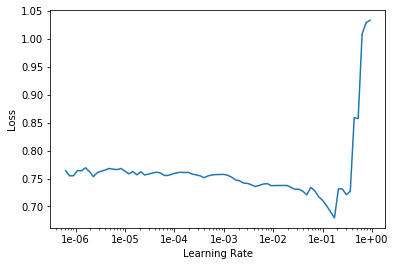

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 04:20
epoch  train_loss  valid_loss  accuracy
1      0.732401    0.718235    0.464696  (01:05)
2      0.705445    0.632740    0.661741  (00:59)
3      0.684055    0.662441    0.564860  (01:03)
4      0.645746    0.707424    0.527094  (01:12)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.637638,0.676244,0.569787
2,0.616409,0.761859,0.533662
3,0.610873,0.586564,0.707718
4,0.573082,0.523991,0.788177
5,0.577701,0.473403,0.834154
6,0.504637,0.450754,0.845649
7,0.512481,0.460351,0.830870
8,0.473114,0.393582,0.865353
9,0.462261,0.358166,0.889984
10,0.471730,0.323821,0.889984


RuntimeError: CUDA error: out of memory

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
print(accuracy_list)

In [ ]:
print(sum(accuracy_list)/len(accuracy_list))

In [ ]:
print(statistics.variance(accuracy_list))

In [ ]:
import torch

torch.cuda.empty_cache()